In [49]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
citation_count_df = pd.read_csv('citation_count.csv')

In [3]:
citation_count_df.head()

,PMC_ID,GENE_PROTEIN_TERTILE,DISEASE_TERTILE,ORGANISM_TERTILE,CITATION_COUNT
0,PMC3483290,3,1,2,4.0
1,PMC3412856,1,1,2,12.0
2,PMC5778619,2,2,2,2.0
3,PMC5371790,2,1,2,1.0
4,PMC3434224,1,2,2,9.0


In [9]:
null_rows = citation_count_df.CITATION_COUNT.isnull()

In [14]:
citation_count_df[null_rows].groupby(['GENE_PROTEIN_TERTILE', 'DISEASE_TERTILE', 'ORGANISM_TERTILE']).size()

GENE_PROTEIN_TERTILE  DISEASE_TERTILE  ORGANISM_TERTILE
1                     1                1                   459
                                       2                    60
                                       3                    41
                      2                1                    62
                                       2                    47
                                       3                    18
                      3                1                    52
                                       2                    32
                                       3                     9
2                     1                1                   140
                                       2                    80
                                       3                    31
                      2                1                    44
                                       2                    53
                                       3                    33

In [18]:
valid_df = citation_count_df.fillna(0)

In [19]:
len(valid_df)

503950

In [23]:
valid_df.groupby(['GENE_PROTEIN_TERTILE', 'DISEASE_TERTILE', 'ORGANISM_TERTILE']).size()

GENE_PROTEIN_TERTILE  DISEASE_TERTILE  ORGANISM_TERTILE
1                     1                1                   42261
                                       2                   18411
                                       3                   18793
                      2                1                   27999
                                       2                   12175
                                       3                   10639
                      3                1                   27251
                                       2                    9070
                                       3                    6978
2                     1                1                   15029
                                       2                   18427
                                       3                   22977
                      2                1                   15747
                                       2                   17629
                                  

In [32]:
valid_df.replace({'GENE_PROTEIN_TERTILE':{1:'L', 2:'M', 3:'H'}, 
                  'DISEASE_TERTILE':{1:'L', 2:'M', 3:'H'}, 
                  'ORGANISM_TERTILE':{1:'L', 2:'M', 3:'H'}}, inplace=True)

In [36]:
valid_df['rank'] = valid_df['GENE_PROTEIN_TERTILE'] +'-'+ valid_df['DISEASE_TERTILE'] + '-' +valid_df['ORGANISM_TERTILE']

In [37]:
valid_df

,PMC_ID,GENE_PROTEIN_TERTILE,DISEASE_TERTILE,ORGANISM_TERTILE,CITATION_COUNT,rank
0,PMC3483290,H,L,M,4.0,H-L-M
1,PMC3412856,L,L,M,12.0,L-L-M
2,PMC5778619,M,M,M,2.0,M-M-M
3,PMC5371790,M,L,M,1.0,M-L-M
4,PMC3434224,L,M,M,9.0,L-M-M
...,...,...,...,...,...,...
503945,PMC4046564,H,L,M,37.0,H-L-M
503946,PMC5751152,H,H,M,10.0,H-H-M
503947,PMC3203150,L,L,M,21.0,L-L-M
503948,PMC4107943,M,H,L,6.0,M-H-L


In [79]:
rank = ['L', 'M', 'H']
ranks = [r1+'-'+r2+'-'+r3 for r1 in rank for r2 in rank for r3 in rank ]

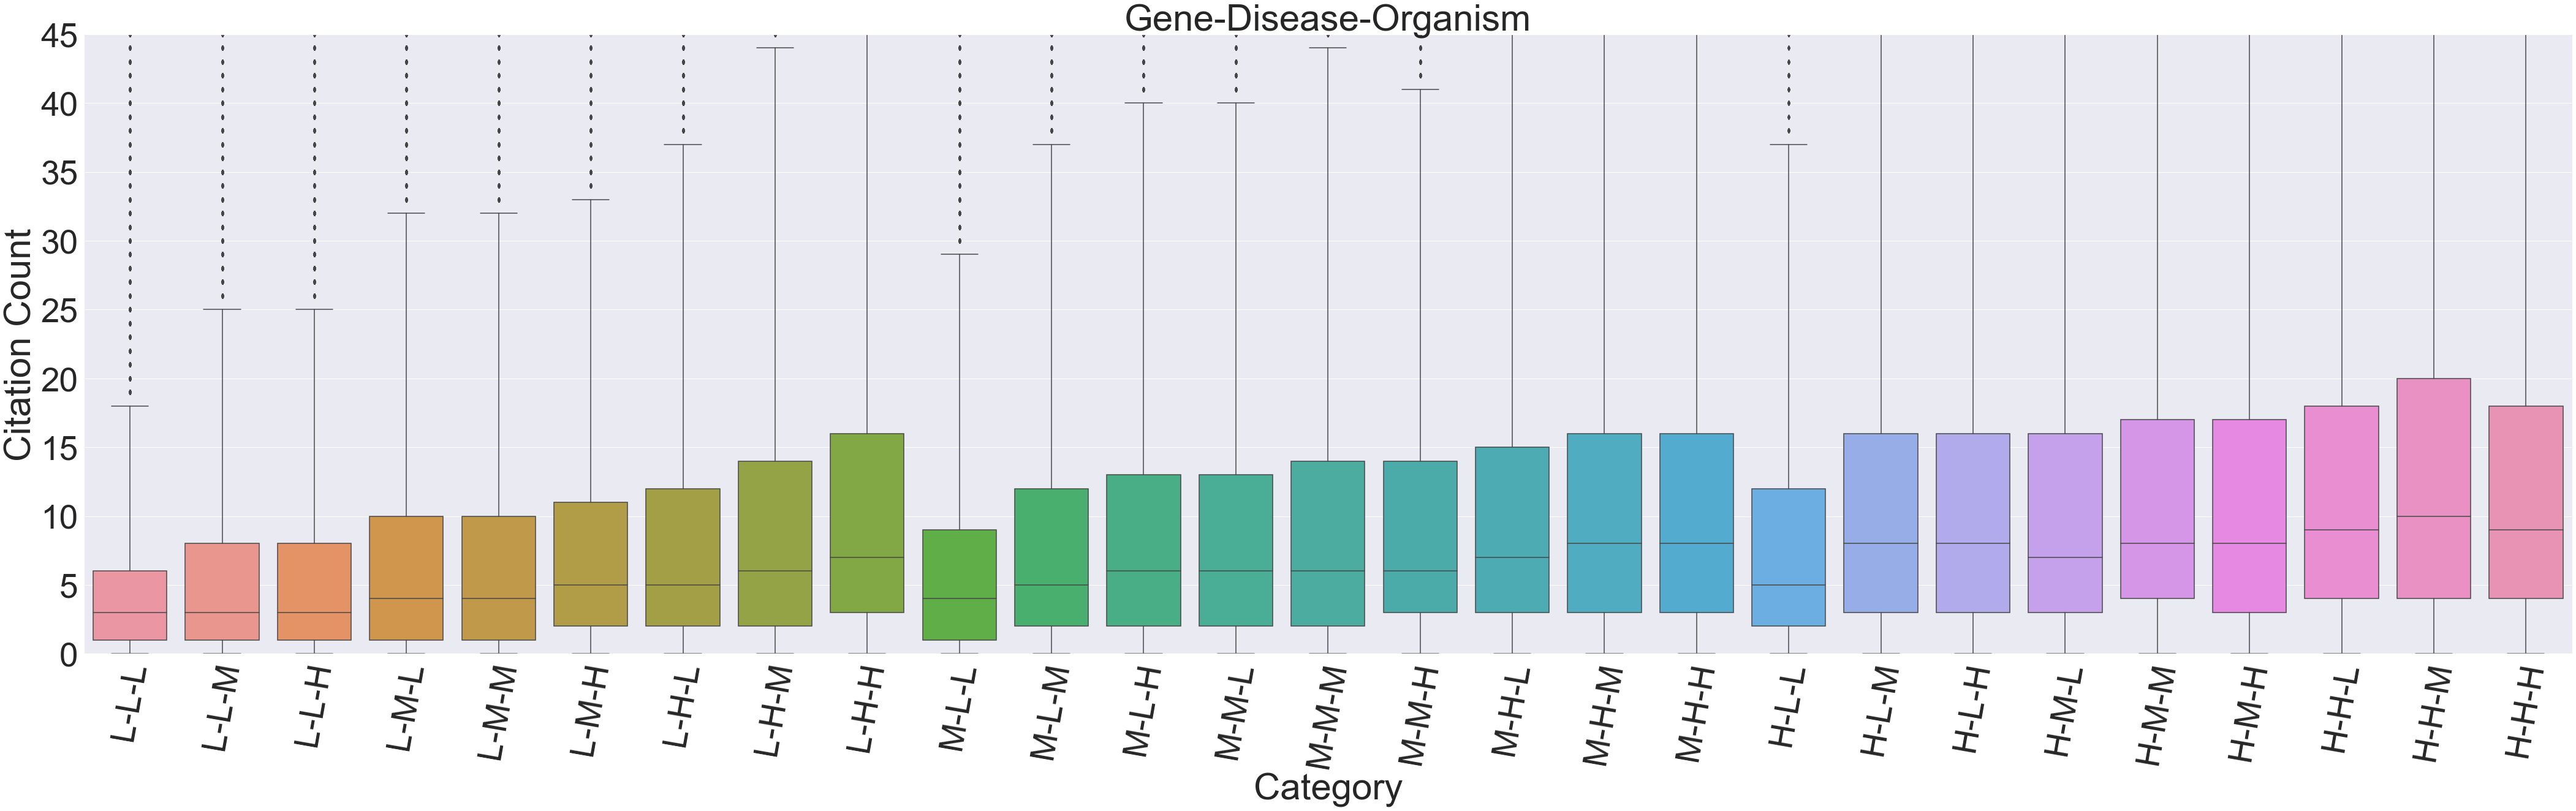

In [155]:
plt.figure(figsize=(60,20))
sns.set(font_scale = 5)
ax = sns.boxplot(x="rank", y="CITATION_COUNT", data=valid_df, order=ranks)
ax.set_ylim(0, 45)
# ax.set_xticklabels(rotation=30)
ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
ax.set_ylabel('Citation Count')
ax.set_xlabel('Category')
ax.set_title('Gene-Disease-Organism')
# ax.set_xticklabels(ax.get_xticks(), size=15)
plt.tight_layout()
# plt.savefig('citation.png')

In [173]:
groups = [(g[0],g[1]) for g in valid_df[['rank', 'CITATION_COUNT']].groupby(['rank'])]

In [168]:
import scipy.stats as stats

In [176]:
groups[4][0], groups[5][0]

('H-L-L', 'H-L-M')

In [177]:
stats.ttest_ind(groups[4][1]['CITATION_COUNT'], groups[5][1]['CITATION_COUNT'],equal_var=False)

Ttest_indResult(statistic=-8.564558857505126, pvalue=1.3160455588129767e-17)

In [150]:
group = valid_df.groupby(['rank']).mean().reset_index()

In [151]:
group

,rank,CITATION_COUNT
0,H-H-H,15.109086
1,H-H-L,15.571465
2,H-H-M,16.290632
3,H-L-H,14.257315
4,H-L-L,10.914483
5,H-L-M,14.275769
6,H-M-H,14.533950
7,H-M-L,13.137042
8,H-M-M,14.151342
9,L-H-H,13.881198


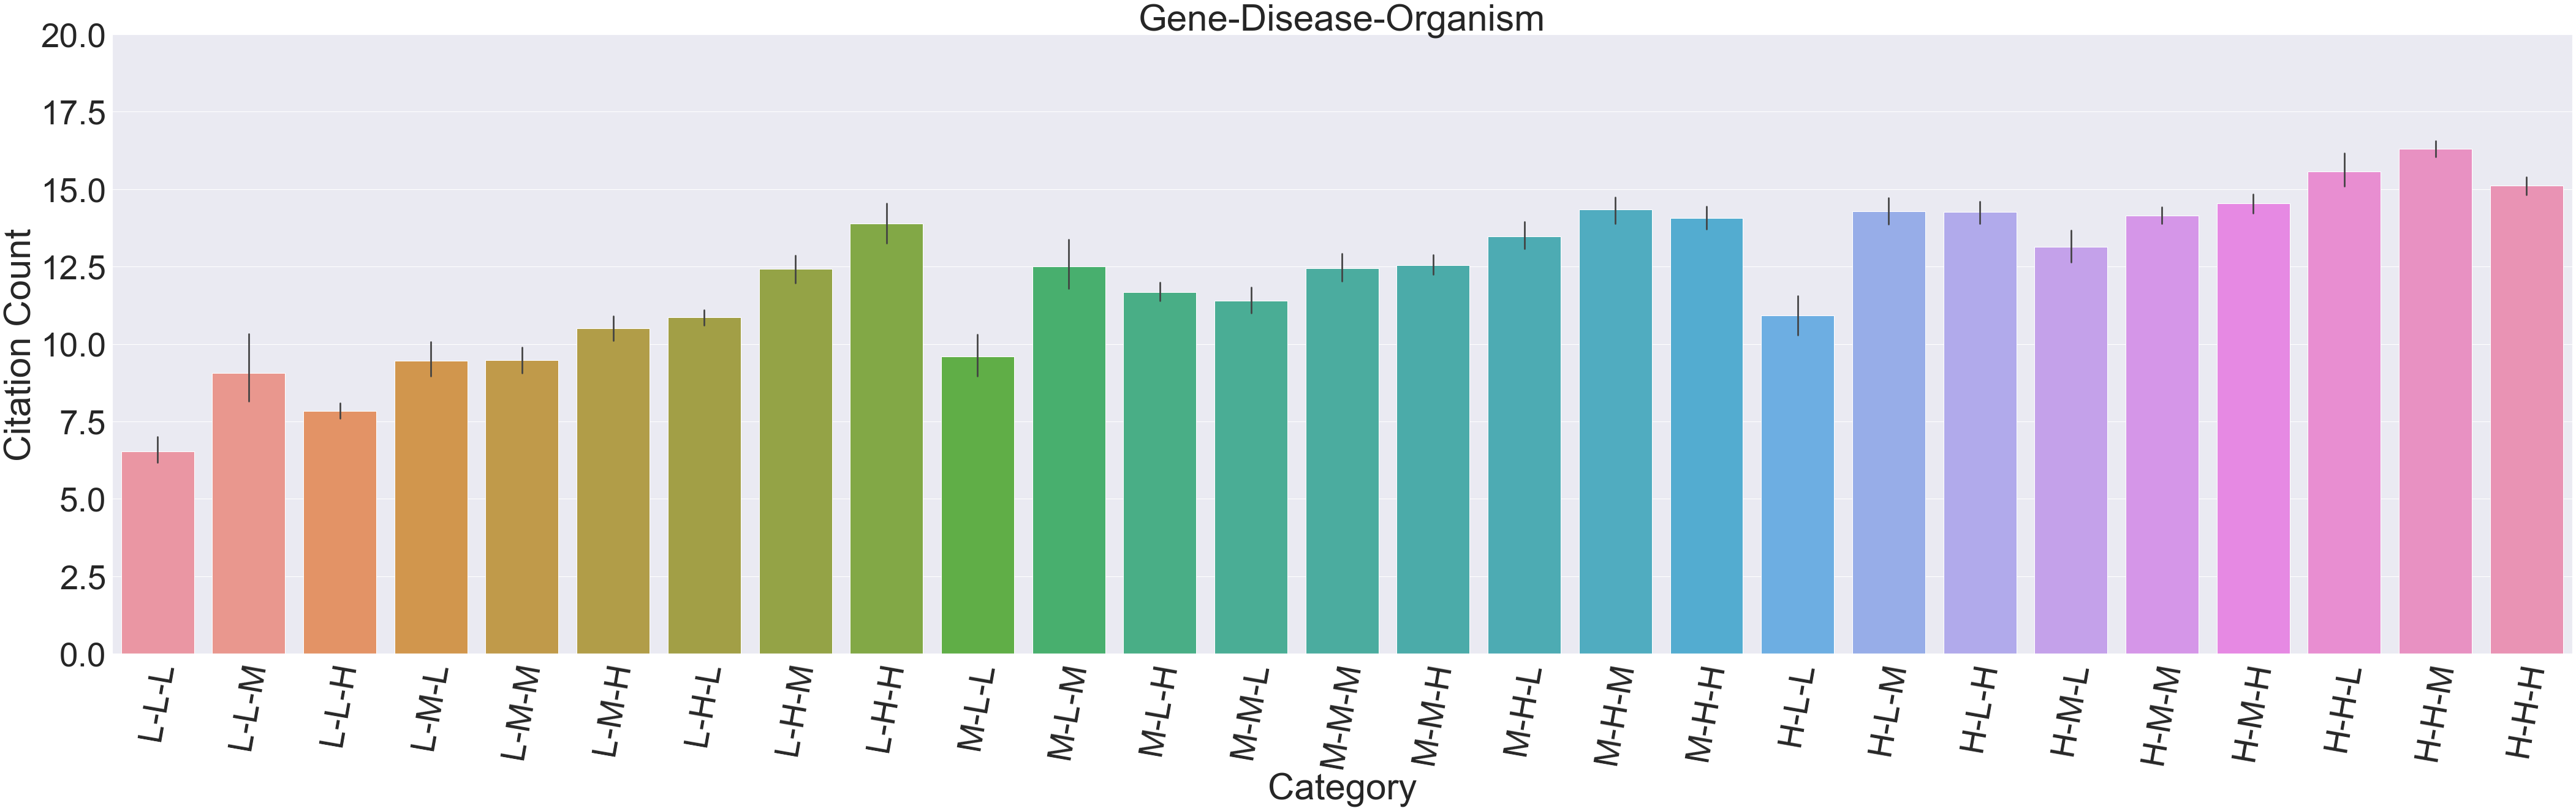

In [145]:
plt.figure(figsize=(60,20))
sns.set(font_scale = 5)
ax = sns.barplot(x="rank", y="CITATION_COUNT", data=valid_df, order=ranks)
ax.set_ylim(0, 20)
ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
ax.set_ylabel('Citation Count')
ax.set_xlabel('Category')
ax.set_title('Gene-Disease-Organism')
plt.tight_layout()

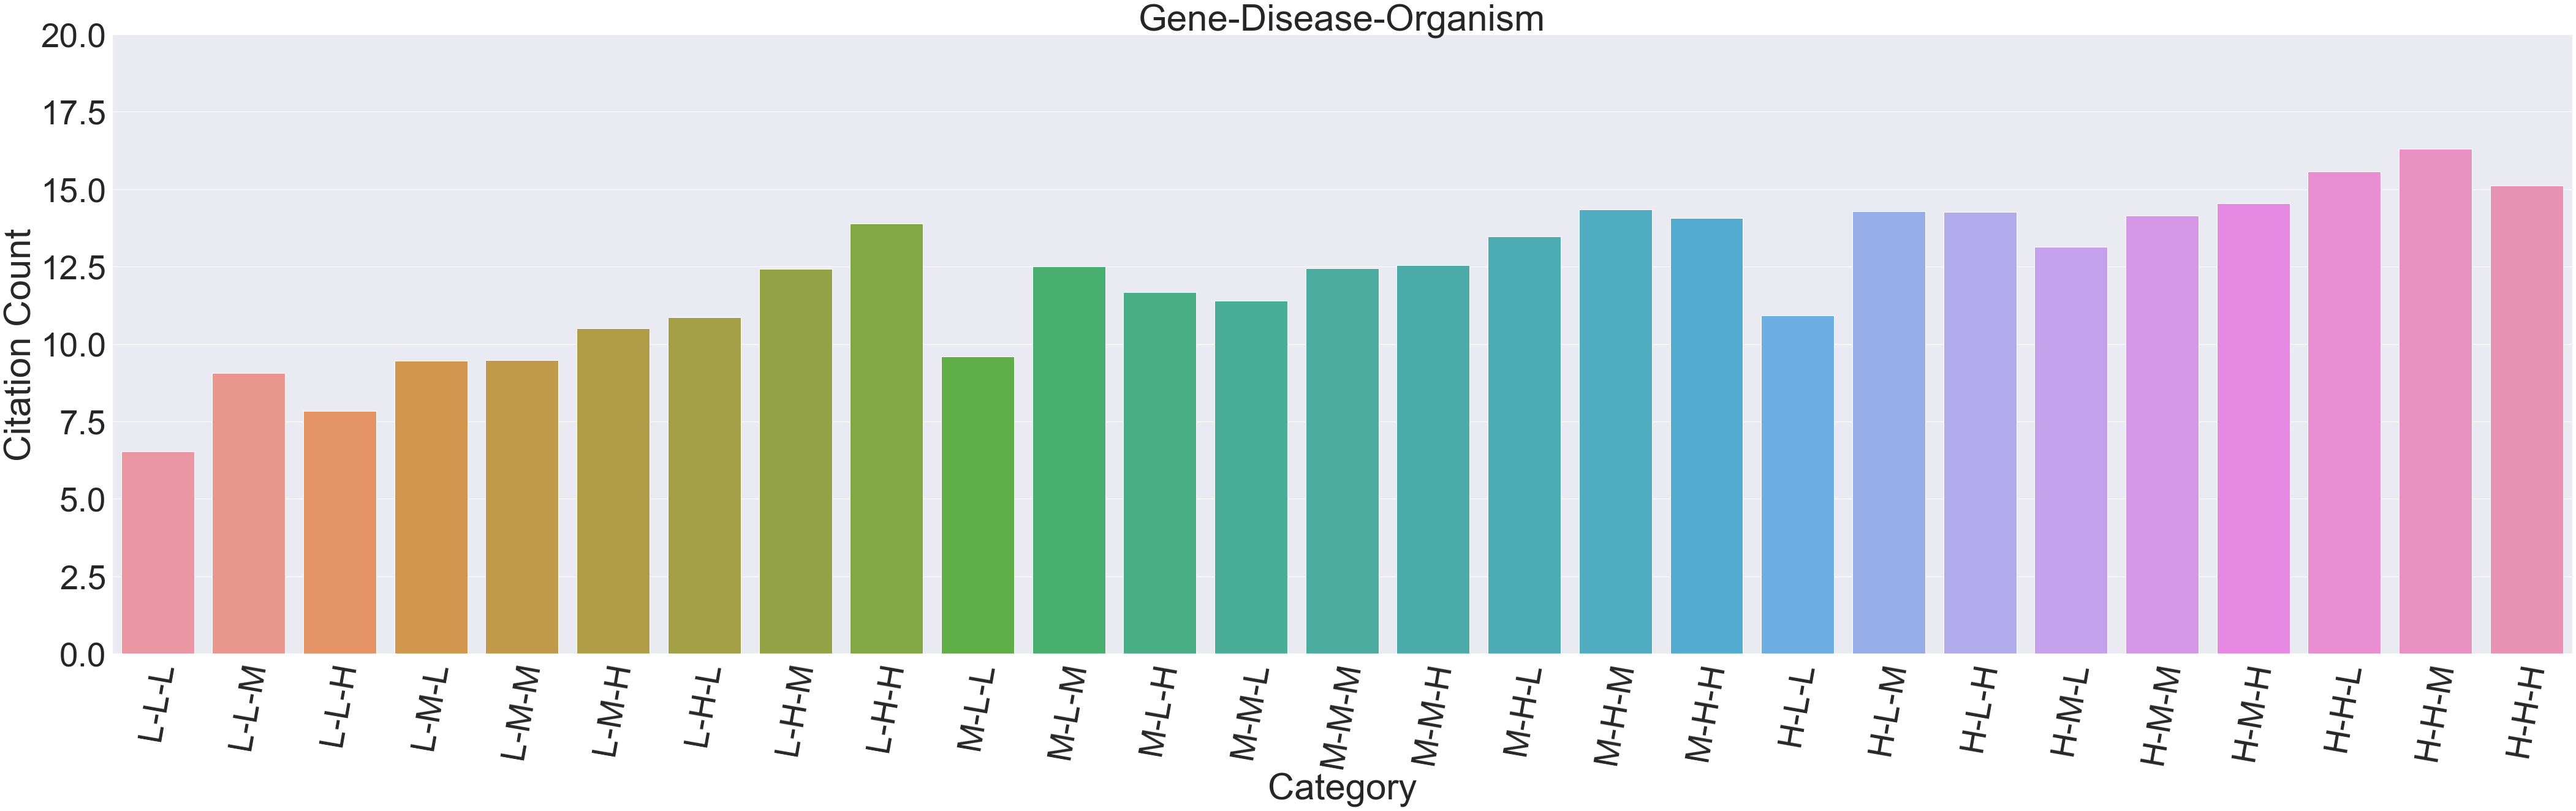

In [152]:
plt.figure(figsize=(60,20))
sns.set(font_scale = 5)
ax = sns.barplot(x="rank", y="CITATION_COUNT", data=group, order=ranks)
ax.set_ylim(0, 20)
ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
ax.set_ylabel('Citation Count')
ax.set_xlabel('Category')
ax.set_title('Gene-Disease-Organism')
plt.tight_layout()